In [1]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# configure sklearn to work with pandas df

set_config(transform_output="pandas")

In [3]:
penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [4]:
penguins.agg(['min','max']) #pull out min and max values for each column

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [5]:
penguins_copy = penguins.copy() #make a copy of our dataset
scaler = StandardScaler() #initialize a scaler
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


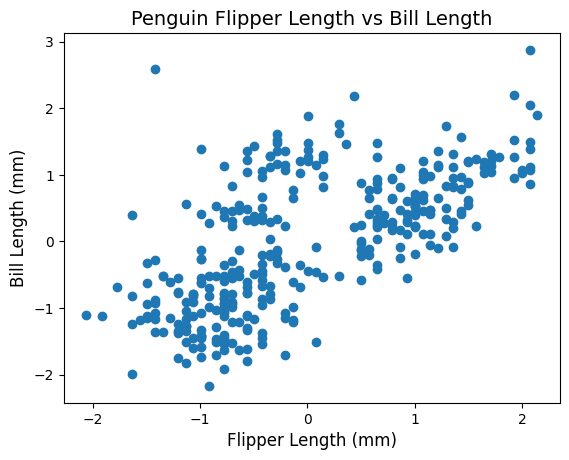

In [6]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [18]:
# perform kmeans clustering
#step 1. intialized our model; for now K = 3
kmeans = KMeans(n_clusters= 3, random_state= 123, n_init=10)

In [19]:
#step 2. fit model to data
clusters = kmeans.fit(standardized_penguins)

In [20]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,

In [21]:
# add cluster labels back to our data set
standardized_penguins_with_clusters = standardized_penguins.copy()
standardized_penguins_with_clusters["Cluster"] = clusters.labels_
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,1
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,2
338,-0.077396,0.077258,2
339,1.041543,-0.563715,2
340,1.261662,0.647013,0


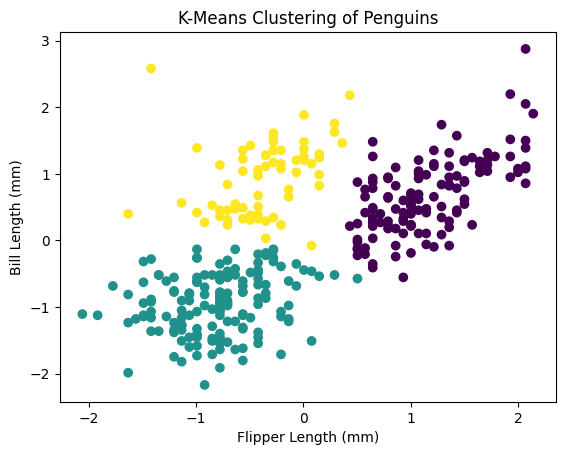

In [22]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()


In [13]:
kmeans.inertia_ #total WSSD

91.47610853298526

In [15]:
#initialize an empty data frame
penguin_clust_ks = pd.DataFrame(columns = ["k","total_wssd"])

for k in range(1,11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init = 10) #initialized model
    elbow_kmeans.fit(standardized_penguins) #fit model to data
    current_k = pd.DataFrame({"k": [k], "total_wssd": elbow_kmeans.inertia_})
    penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index=True)

/var/folders/9y/zgnxp44x71g645k284kc5j_h0000gn/T/ipykernel_40698/3815367810.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index=True)


In [16]:
penguin_clust_ks

,k,total_wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


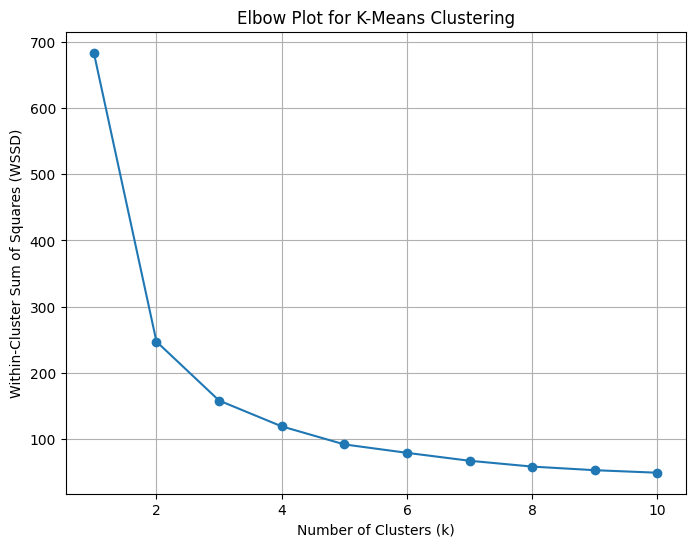

In [17]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['total_wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.grid(True)
plt.show()
